In [23]:
import xarray as xr
import matplotlib.pyplot as plt

In [71]:
ds = xr.open_mfdataset('/Users/baart_f/data/gtsm/nodal/*YEARMAX*.nc', combine='by_coords')
ds

<xarray.Dataset>
Dimensions:                               (bnds: 2, nFlowElemWithBnd: 225038, nFlowLink: 417800, nFlowLinkPts: 2, nNetLink: 429999, nNetLinkPts: 2, stations: 4204, time: 19)
Coordinates:
    station_x_coordinate                  (stations) float64 dask.array<chunksize=(4204,), meta=np.ndarray>
    station_y_coordinate                  (stations) float64 dask.array<chunksize=(4204,), meta=np.ndarray>
  * time                                  (time) datetime64[ns] 1999-07-02T11:55:00 ... 2017-07-02T11:55:00
Dimensions without coordinates: bnds, nFlowElemWithBnd, nFlowLink, nFlowLinkPts, nNetLink, nNetLinkPts, stations
Data variables:
    time_bnds                             (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    FlowElem_zcc                          (time, nFlowElemWithBnd) float64 dask.array<chunksize=(1, 225038), meta=np.ndarray>
    FlowElem_bac                          (time, nFlowElemWithBnd) float64 dask.array<chunksize=(1, 225038), meta=np.ndarray>
    FlowElem_bl                           (time, nFlowElemWithBnd) float64 dask.array<chunksize=(1, 225038), meta=np.ndarray>
    ElemLink                              (time, nNetLink, nNetLinkPts) int32 dask.array<chunksize=(1, 429999, 2), meta=np.ndarray>
    FlowLink                              (time, nFlowLink, nFlowLinkPts) int32 dask.array<chunksize=(1, 417800, 2), meta=np.ndarray>
    FlowLinkType                          (time, nFlowLink) int32 dask.array<chunksize=(1, 417800), meta=np.ndarray>
    FlowLink_xu                           (time, nFlowLink) float64 dask.array<chunksize=(1, 417800), meta=np.ndarray>
    FlowLink_yu                           (time, nFlowLink) float64 dask.array<chunksize=(1, 417800), meta=np.ndarray>
    FlowElemDomain                        (time, nFlowElemWithBnd) int32 dask.array<chunksize=(1, 225038), meta=np.ndarray>
    FlowLinkDomain                        (time, nFlowLink) int32 dask.array<chunksize=(1, 417800), meta=np.ndarray>
    FlowElemGlobalNr                      (time, nFlowElemWithBnd) int32 dask.array<chunksize=(1, 225038), meta=np.ndarray>
    station_geom_node_count               (time, stations) int32 dask.array<chunksize=(1, 4204), meta=np.ndarray>
    waterlevel                            (time, stations) float64 dask.array<chunksize=(1, 4204), meta=np.ndarray>
    bedlevel                              (time, stations) float64 dask.array<chunksize=(1, 4204), meta=np.ndarray>
    x_velocity                            (time, stations) float64 dask.array<chunksize=(1, 4204), meta=np.ndarray>
    y_velocity                            (time, stations) float64 dask.array<chunksize=(1, 4204), meta=np.ndarray>
    patm                                  (time, stations) float64 dask.array<chunksize=(1, 4204), meta=np.ndarray>
    water_balance_total_volume            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_storage                 (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_volume_error            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_boundaries_in           (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_boundaries_out          (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_boundaries_total        (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_exchange_with_1D_in     (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_exchange_with_1D_out    (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_exchange_with_1D_total  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_precipitation           (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_evaporation             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    water_balance_source_sink             (time) float64 d

In [25]:
x = ds['waterlevel'].station_x_coordinate.values
y = ds['waterlevel'].station_y_coordinate.values
wl = ds['waterlevel'].mean(axis=0).values

In [62]:
import numpy as np
import scipy.interpolate

vmax = np.abs(wl).max()
vmin = -vmax

104 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


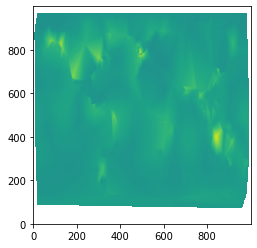

In [70]:
X, Y = np.mgrid[-180:180:1000j, -90:90:1000j]

%timeit scipy.interpolate.griddata(np.c_[x, y], wl, (X, Y), method='linear').T
plt.imshow(scipy.interpolate.griddata(np.c_[x, y], wl, (X, Y), method='linear').T, origin='bottom', vmax=vmax, vmin=vmin)


48.1 ms ± 635 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


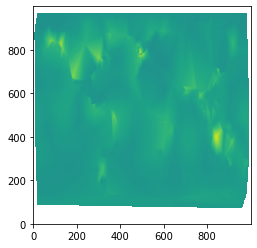

In [64]:
N = scipy.interpolate.LinearNDInterpolator(np.c_[x, y], wl)
%timeit N((X, Y))

plt.imshow(N((X, Y)).T, origin='bottom', vmax=vmax, vmin=vmin)


916 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


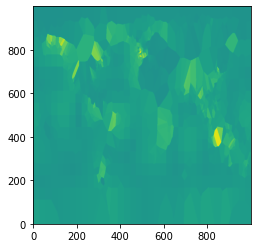

In [65]:
N = scipy.interpolate.NearestNDInterpolator(np.c_[x, y], wl)
%timeit N((X, Y))

plt.imshow(N((X, Y)).T, origin='bottom', vmax=vmax, vmin=vmin)


200 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


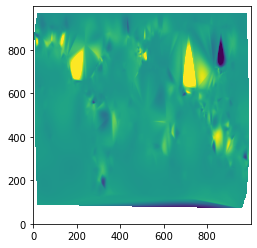

In [66]:
N = scipy.interpolate.CloughTocher2DInterpolator(np.c_[x, y], wl)
%timeit N((X, Y))

plt.imshow(N((X, Y)).T, origin='bottom', vmax=vmax, vmin=vmin)
